In [153]:
import pandas as pd
import numpy as numpy
import pylab
import matplotlib.pyplot as mlpt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale

#To read the CSV file
salary_dataframe=pd.read_csv('C:\\Users\\kp\\Pictures\\Assignments\\Simple Linear Regression\\Salary_Data.csv')
#TO derive the number of rows and columns the given data set has
print(salary_dataframe.shape)

#Assigning the columns and labels to X,Y
X=salary_dataframe['YearsExperience'].values.reshape(-1, 1)
y=salary_dataframe['Salary'].values.reshape(-1, 1)

#To split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#To train the model
regression=LinearRegression(normalize=True)
regression.fit(X_train,y_train)

#To retrieve the intercept:
print(regression.intercept_)
#For retrieving the slope:
print(regression.coef_)

#For predicting the values
y_pred = regression.predict(X_test)
print(y_pred)

#To create a new data frame.
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

#To predict the mean values.
print('Mean Absolute Error by Sklearn Model:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error by Sklearn Model:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error by Sklearn Model:', numpy.sqrt(metrics.mean_squared_error(y_test, y_pred)))

(30, 2)
[26780.09915063]
[[9312.57512673]]
[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753
Mean Absolute Error by Sklearn Model: 2446.1723690465114
Mean Squared Error by Sklearn Model: 12823412.298126606
Root Mean Squared Error by Sklearn Model: 3580.9792373213513


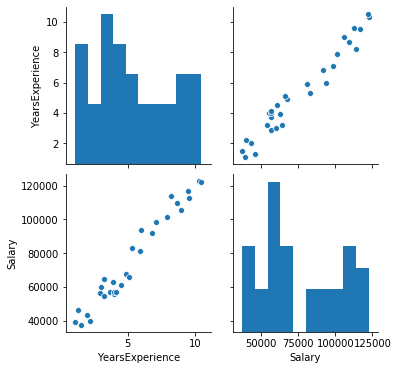

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     745.9
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.13e-20
Time:                        12:15:56   Log-Likelihood:                -277.63
No. Observations:                  28   AIC:                             559.3
Df Residuals:                      26   BIC:                             561.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.401e+04    960.354     

In [154]:
# Building the Model using StatsModels

# Scatter plot between the variables along with histograms
sns.pairplot(salary_dataframe)
mlpt.show() # Predictor and Target Variables doesnt seem to be normally Distributed

#Dropping records which are too sensitive for the regressor to learn the pattern(Outliers) by Influencer Plot
salary_dataframe.drop(salary_dataframe.index[[19,23]],axis=0,inplace=True)

#Transforming the predictor variable values
salary_dataframe['YearsExperience']=salary_dataframe['YearsExperience'].transform(func=scale)
#With or Without Transforming the predictor variable values doesn't show any impact on the Model's performance

regressor=smf.ols("Salary~YearsExperience",data=salary_dataframe).fit()

#Summary
print(regressor.summary())

preds=regressor.predict(salary_dataframe['YearsExperience'])

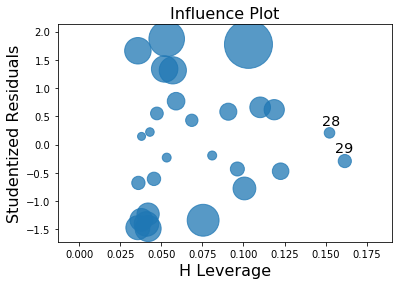

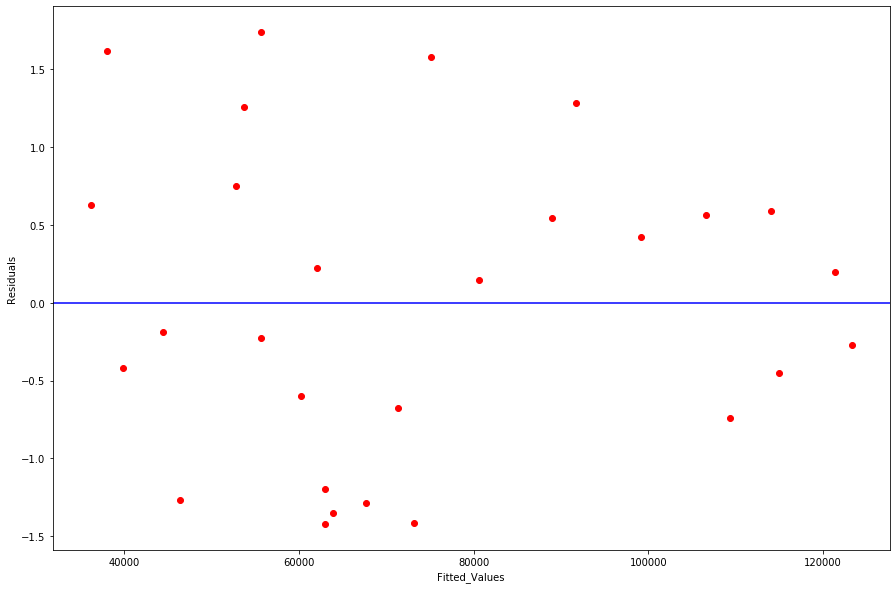

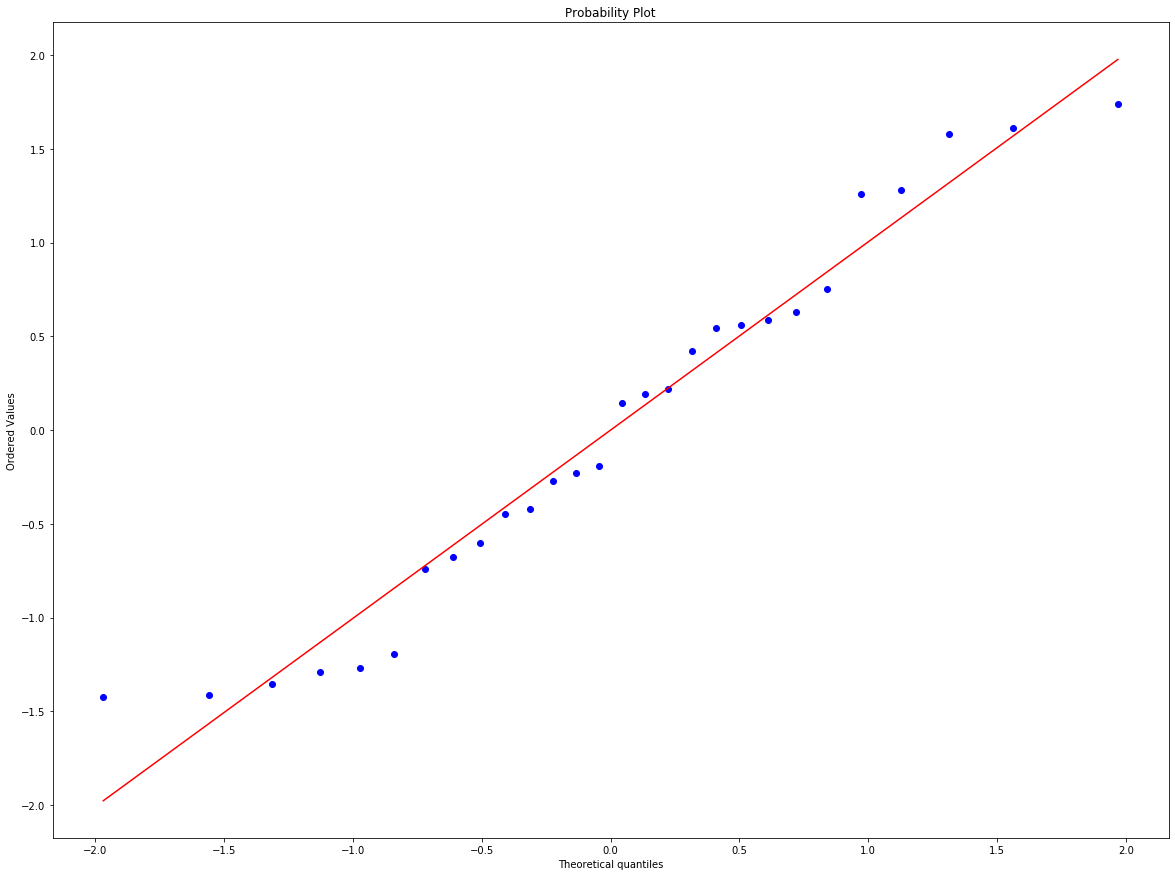

In [155]:
sm.graphics.influence_plot(regressor,figsize=(15,10)) #Influencer Plot
mlpt.show()

# Homoscedasticity : Error term being same across all values of independent variables
# Fitted Values Vs Residuals
mlpt.figure(figsize=(15,10))
mlpt.scatter(preds,regressor.resid_pearson,c="r"),mlpt.axhline(y=0,color='blue');mlpt.xlabel("Fitted_Values");mlpt.ylabel("Residuals")
mlpt.show()

#Normality Test for Residuals
#In Order to have a Model's good fit it is important to have the Residuals follow a Normal Distribution Pattern

# Normal Distribution Check using Q-Q plot
mlpt.figure(figsize=(20,15))
st.probplot(regressor.resid_pearson, dist="norm", plot=pylab) #Residuals can be said to be nearly Normally Distributed
mlpt.show()

In [156]:
#To predict the mean values.
print('Mean Absolute Error by Stats Model:', metrics.mean_absolute_error(salary_dataframe['Salary'],preds))
print('Mean Squared Error by Stats Model:', metrics.mean_squared_error(salary_dataframe['Salary'],preds))
print('Root Mean Squared Error by Stats Model:', numpy.sqrt(metrics.mean_squared_error(salary_dataframe['Salary'],preds)))
print("R-Square Value of the Model(Measure of Fit): ",regressor.rsquared)

#Conclusion: Transforming the predictor variable to log/sqrt/normalize yields less R-Squared Value and High RMSE value so used
#scale to standardize the predictor values and yields better R-Squared Value and low RMSE value compared to other Transformations
# But With or Without Transforming the predictor variable values doesn't show any impact on the Model's performance
# Seems like Sklearn LinearRegression does better job than Statsmodels OLS

Mean Absolute Error by Stats Model: 4181.527525790643
Mean Squared Error by Stats Model: 23979254.556818124
Root Mean Squared Error by Stats Model: 4896.861704889992
R-Square Value of the Model(Measure of Fit):  0.9663157552491084
